In [1]:
import sys
sys.path.append('./src/')
import numpy as np
import matplotlib.pyplot as plt
from propagation import Propagation
from backpropagation import BackPropagation
from activation import ReLU, Softmax, Identity
from loss_fn import MSE, CrossEntropy
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import StandardScaler

In [2]:
# 多クラス分類
data_iris = load_iris()
data, y_true = data_iris.data, data_iris.target
scaler = StandardScaler()
data = scaler.fit_transform(data)

ground_truth = np.zeros((len(y_true), 3)) # 3class分類問題
for i in range(len(y_true)):
    ground_truth[i][y_true[i]] = 1


print(f"data is : {data[1:5, :]}\n")
print(f"ground_truth is: {ground_truth[1:5]}\n")
print(f"data shape is :{data.shape}")
print(f"ground_truth shape is :{ground_truth.shape}")

data is : [[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

ground_truth is: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

data shape is :(150, 4)
ground_truth shape is :(150, 3)


In [3]:
# softmax関数を実装する
layers = (10, 3)
model = BackPropagation(layers, activation=ReLU(), last_activation=Softmax(), loss_fn=CrossEntropy())

model.fit(data, ground_truth, step_size = 1e-2, threshold=1e-4, max_itr=10000)
pred = model.predict(data)

print(f"\npred: {pred[0:2, :]}")

Epoch: 10000, loss: 20.9986
最大Epoch数に到達しました。

pred: [[0.99546917 0.00296809 0.00156274]
 [0.99546917 0.00296809 0.00156274]]


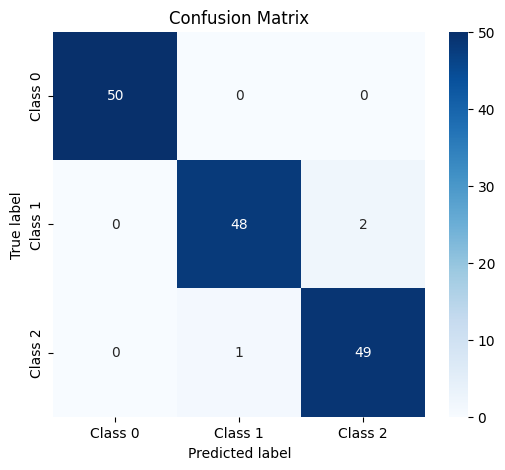

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_pred = np.argmax(pred, axis=1)
y_pred = class_pred.flatten()
cm = confusion_matrix(y_true, y_pred)
class_names = [f"Class {i}" for i in range(cm.shape[0])]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [5]:
diab = load_diabetes()
X, y = diab.data, diab.target
y = y.reshape(-1, 1)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


print(f"data shape is :{X_scaled.shape}")
print(f"ground_truth shape is :{y_scaled.shape}")
print(f"data is : {X_scaled[0:3, :]}\n")
print(f"ground_truth is: {y_scaled[0:3]}\n")

data shape is :(442, 10)
ground_truth shape is :(442, 1)
data is : [[ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
  -0.91245053 -0.05449919  0.41853093 -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 -0.55350458 -0.17762425 -0.40288615
   1.56441355 -0.83030083 -1.43658851 -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 -0.1192138  -0.95867356 -0.71889748
  -0.68024452 -0.05449919  0.06015558 -0.54515416]]

ground_truth is: [[-0.01471948]
 [-1.00165882]
 [-0.14457991]]



In [6]:
layers = (32, 1)
model = BackPropagation(layers, activation=ReLU(), last_activation=Identity(), loss_fn=MSE())
model.fit(X_scaled, y_scaled, step_size = 1e-4, threshold=1e-4, max_itr=1000)
pred = model.predict(data=X_scaled)

Epoch: 1000, loss: 6.0533
最大Epoch数に到達しました。


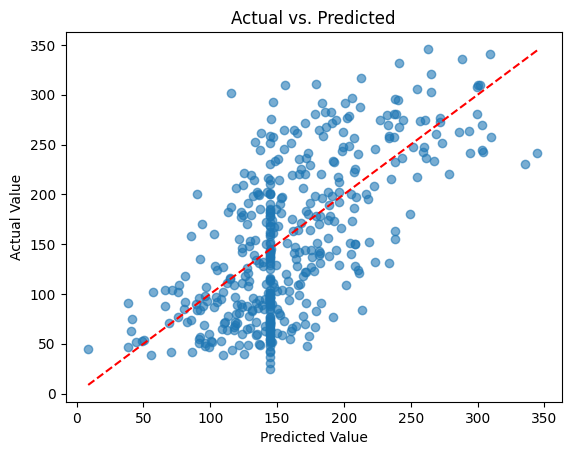

In [7]:
y_true = scaler_y.inverse_transform(y_scaled)
y_pred = scaler_y.inverse_transform(pred)

plt.figure()
plt.scatter(y_pred, y_true, alpha=0.6)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Actual vs. Predicted")
plt.show()